<table>
<tr>
    <td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
    <td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Geophysikalisches Praktikum: Create coordinates and elevation data -ERT-

## Create coordinates and elevation data 
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import libGP

----
## Read **elevation** data in `geodyn` format
We first need to load elevation data (in `geodyn5` format), which are needed for interpolating the 
elevation section of the profile.

In [7]:
easting,northing,elevation = libGP.readTopography("2Dm_GP2024_DTM.xy",path='./data/FUGeocampus/',iskip=5,control=True,plot=False)

File read:                  ./data/FUGeocampus/2Dm_GP2024_DTM.xy
Number of topo lines:       160810
Number of meta-data read:   9
Number of topo data read:   32160
min/max easting:            388200.0 388600.0
min/max northing:           5809500.0 5809900.0
min/max elevation:          40.45 46.21


----
## Create **coordinate** file
We use a set of manually taken GPS points along a profile, which need to be stored in a `numpy`array:

In [12]:
help(libGP.createERTCoordElevation)

Help on function createERTCoordElevation in module libGP:

createERTCoordElevation(nameERT, nElectrodes, sElectrodes, GPSPoints, easting, northing, elevation, path='./', control=False, plot=False)
    Read GPS coordinates taken along ERT profile, 
    create coordinates for every electrode position
    and interpolate elevation for electrode from topo data
    
    Parameters
    ----------
    nameERT : str
        name of ERT profile
    nElectrodes : int
        number of electrodes along profile
    sElectrodes : int
        electrode spacing [m]
    GPSPoints : 2D float array 
        List of GPS points easting,northing) along profile
    easting : 1D float array
        List of easting coordinates [m] (from readTopography.py)
    northing : 1D float array
        List of northing coordinates [m] (from readTopography.py)
    elevation : 1D float array
        List of elevations [m] (from readTopography.py)
    control : bool
        Control output, default: None
    plot : bool
  

Then we define the number of electrode, `nElectrodes`, and the electrode spacing, `sElectrodes`.

A name is needed for the output profile data set, `ertProfile`.

nameERT:                    GP2021_ERT02_Schlumberger
nElectrodes:                25
sElectrodes:                3
Profile length:             72  m
GPS points:                 2
GPSDistance:                70.04535048811695
extrapolate last point
[[ 388456.735      5809761.262     ]
 [ 388386.51877629 5809777.1893955 ]]
GPSDistance:                71.99999999990735
   0 388456.73500000 5809761.26200000    43.55     0.00
   1 388453.80932401 5809761.92564148    43.80     3.00
   2 388450.88364802 5809762.58928296    43.76     6.00
   3 388447.95797204 5809763.25292444    43.78     9.00
   4 388445.03229605 5809763.91656592    43.86    12.00
   5 388442.10662006 5809764.58020740    43.94    15.00
   6 388439.18094407 5809765.24384887    44.04    18.00
   7 388436.25526808 5809765.90749035    44.09    21.00
   8 388433.32959210 5809766.57113183    44.01    24.00
   9 388430.40391611 5809767.23477331    43.92    27.00
  10 388427.47824012 5809767.89841479    43.92    30.00
  11 388424.552

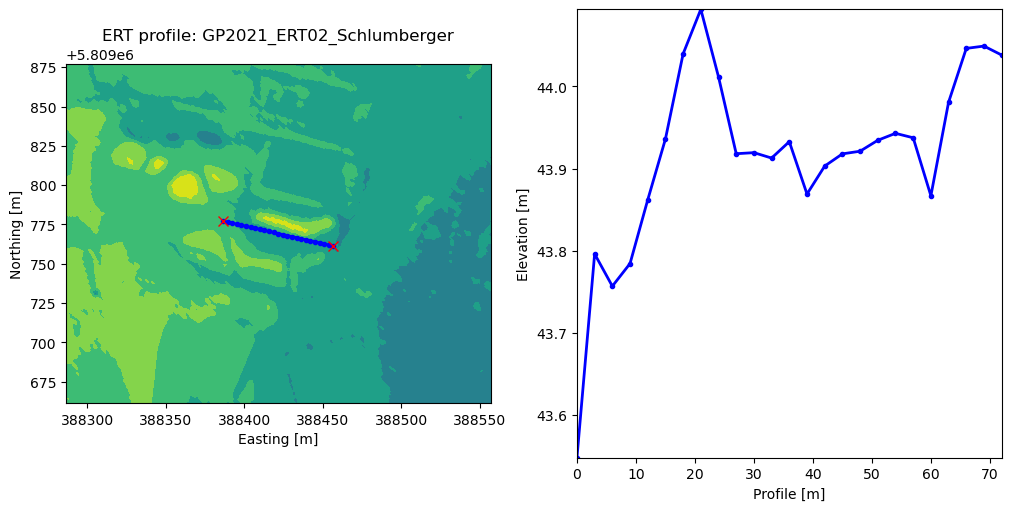

In [13]:
ertProfile  = 'GP2021_ERT02_Schlumberger'
nElectrodes = 25
sElectrodes = 3
GPSPoints = np.array([
[388456.735,5809761.262],
[388388.425,5809776.757]
])

elecPoints = libGP.createERTCoordElevation(ertProfile,nElectrodes,sElectrodes,GPSPoints,easting,northing,elevation,
                                           path='tmp/',control=True,plot=True)

----
## Add **profile length and elevation** to **ERT data** in `Res2DInv` format

In [14]:
help(libGP.addERTCoordElevation)

Help on function addERTCoordElevation in module libGP:

addERTCoordElevation(fileERT, elecPoints, path='./', control=False)
    Add profile length and elevation along ERT profile
    to Res2DInv file
    
    Parameters
    ----------
    fileERT : str
        file name of ERT profile in Res2DInv format
    elecPoints : 2D float array
        List of coordinates, elevations, and distances for profile electrodes [m]
        elecPoints[:,0] - easting [m]
        elecPoints[:,1] - northing [m]
        elecPoints[:,2] - elevation [m]
        elecPoints[:,3] - distance [m]
    path : str 
        Path to input file, default: ./
    control : bool
        Control output, default: None
        
    Returns
    -------
    -none-
    
    Notes
    -----
    Read the ERT file in Res2DInv format and replaces last section with elevation data



In [16]:
ertData = 'GP2021_ERT02_Schlumberger.dat'
libGP.addERTCoordElevation(ertData,elecPoints,path='tmp/',control=False)

File read:                  tmp/GP2021_ERT02_Schlumberger.dat
File written:               tmp/GP2021_ERT02_Schlumberger_mod.dat


----